In [1]:
from keras.models import model_from_json
from inception_resnet_v1 import *
import numpy as np

from keras.models import Sequential
from keras.models import load_model
from keras.models import model_from_json
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input

import matplotlib.pyplot as plt
from keras.preprocessing import image

import pathlib
import pandas as pd

def l2_normalize(x):
    return x / np.sqrt(np.sum(np.multiply(x, x)))

def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(160, 160))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

model = InceptionResNetV1()

In [2]:
BASE_PATH = pathlib.Path('../data/mfr2')
labels_path = BASE_PATH / 'mfr2_labels.txt'
pairs_path = BASE_PATH / 'pairs.txt'

In [3]:
labels=pd.read_csv(filepath_or_buffer=str(labels_path))
labels=labels.apply(lambda x: x.apply(lambda y: y.strip() if type(y) == type('') else y), axis=0)
people=labels["person"].unique()

def get_indexes(person, mask=True):
    if mask:
        mask_filter = labels["mask"]!="no-mask"
    else:
        mask_filter = labels["mask"]=="no-mask"
    person_filter = labels["person"]==person
    return list(labels[person_filter & mask_filter]["index"])

pairs={person:list(zip(get_indexes(person,mask=True), get_indexes(person, mask=False))) for person in people}

In [4]:
# with pairs_path.open() as f:
#     pairs_data = [l.strip().split(' ') for l in f.readlines() if l.strip()]

# pairs = []
# for pair_data in pairs_data:
#     if len(pair_data) == 3:
#         pairs.append(((pair_data[0], pair_data[1]), (pair_data[0], pair_data[2])))
#     elif len(pair_data) == 4:
#         pairs.append(((pair_data[0], pair_data[1]), (pair_data[2], pair_data[3])))
#     else:
#         print('wtf', pair_data)

In [5]:
results = []
threshold = 0.35

# positive test
for person, pairs in pairs.items():
    for index1, index2 in pairs:
        path1 = BASE_PATH / person / f'{person}_{str(index1).rjust(4, "0")}.png'
        path2 = BASE_PATH / person / f'{person}_{str(index2).rjust(4, "0")}.png'
        
        features1 = l2_normalize(model.predict(preprocess_image(path1)))
        features2 = l2_normalize(model.predict(preprocess_image(path2)))

        distance = findEuclideanDistance(features1, features2)
        matched = distance < threshold
        if matched:
            print("verified... they are same person")
        else:
            print("unverified! they are not same person!")
        
        results.append([(person, index1, index2), matched, distance])

verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified..

In [6]:
# results = []

# # positive test
# for pair in pairs:
#     (person1,index1),(person2,index2) = pair
#     path1 = BASE_PATH / person1 / f'{person1}_{str(index1).rjust(4, "0")}.png'
#     path2 = BASE_PATH / person2 / f'{person2}_{str(index2).rjust(4, "0")}.png'
    
# #     try:
#     features1,features2=get_embeddings([path1, path2])
#     matched, distance = is_match(features1, features2)
# #     except Exception as e:
# #         print(e)
# #         continue
    
#     results.append([pair, matched, distance])

In [7]:
TP=len([x for x in results if x[1]]) / len(results)
FN=1-TP

In [8]:
TP

0.989010989010989

In [9]:
FN

0.01098901098901095

In [10]:
len(list(BASE_PATH.iterdir()))

55

In [11]:
import random
results_neg = []
count = 0

for person1 in BASE_PATH.iterdir():
    random_people = list(BASE_PATH.iterdir())
    random.shuffle(random_people)
    i=0
    for person2 in random_people:
        if not person1.is_dir() or not person2.is_dir() or person1.name == person2.name or not person1.name.isalpha() or not person2.name.isalpha():
            continue
        count += 1
        if count >= len(results):
            break
        index1 = index2 = 1
        
        path1 = BASE_PATH / person1.name / f'{person1.name}_{str(index1).rjust(4, "0")}.png'
        path2 = BASE_PATH / person2.name / f'{person2.name}_{str(index2).rjust(4, "0")}.png'

        features1 = l2_normalize(model.predict(preprocess_image(path1)))
        features2 = l2_normalize(model.predict(preprocess_image(path2)))

        distance = findEuclideanDistance(features1, features2)
        matched = distance < threshold
        if matched:
            print("verified... they are same person")
        else:
            print("unverified! they are not same person!")

        results_neg.append([(person1, person2), matched, distance])
        i+=1
        if i == 2:
            break

verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
unverified! they are not same person!
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verif

In [12]:
FP=len([x for x in results_neg if x[1]]) / len(results_neg)
TN=1-FP

In [13]:
len(results)

91

In [14]:
len(results_neg)

90

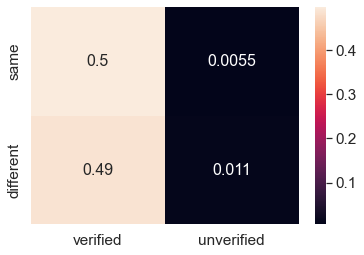

In [15]:
TP=len([x for x in results if x[1]]) / (len(results) + len(results_neg))
FN=len([x for x in results if not x[1]]) / (len(results) + len(results_neg))
FP=len([x for x in results_neg if x[1]]) / (len(results) + len(results_neg))
TN=len([x for x in results_neg if not x[1]]) / (len(results) + len(results_neg))
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[TP,FN],
         [FP,TN]]

df_cm = pd.DataFrame(array, ['same', 'different'], ['verified', 'unverified'])
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [16]:
from sklearn import svm
X = [x[2] for x in results] + [x[2] for x in results_neg]
y = [1 for x in results] + [0 for x in results_neg]
clf = svm.SVC() #kernel="linear")
clf.fit(np.array(X).reshape(-1, 1), y)

SVC()

In [17]:
ps=clf.predict(np.array([x[2] for x in results]).reshape(-1, 1))

In [18]:
len([x for x in ps if x == 1])

39

In [19]:
ns=clf.predict(np.array([x[2] for x in results_neg]).reshape(-1, 1))

In [20]:
np.array([x[2] for x in results + results_neg])

array([0.12128817, 0.11884253, 0.1185279 , 0.1173823 , 0.13029821,
       0.13722067, 0.14393842, 0.24276662, 0.22970341, 0.15951675,
       0.28653076, 0.14130609, 0.20808691, 0.16762201, 0.2076459 ,
       0.25014418, 0.14808138, 0.21893264, 0.17740707, 0.08209834,
       0.10915806, 0.1819173 , 0.16599368, 0.15415496, 0.22037074,
       0.25878727, 0.12599263, 0.15663598, 0.21111558, 0.1914298 ,
       0.2206363 , 0.1892628 , 0.16829064, 0.19429894, 0.24872167,
       0.09208491, 0.12044472, 0.10053351, 0.13242225, 0.10479463,
       0.12927411, 0.09465121, 0.09837946, 0.10867098, 0.12115471,
       0.31186363, 0.16634837, 0.12649994, 0.1884564 , 0.15997118,
       0.14360115, 0.24196808, 0.15388682, 0.14043634, 0.09712844,
       0.23704872, 0.12524374, 0.1605083 , 0.19542657, 0.1778865 ,
       0.18318008, 0.2209672 , 0.13192569, 0.14966194, 0.1797214 ,
       0.11548324, 0.13247912, 0.26899183, 0.14961557, 0.29407665,
       0.4305719 , 0.19593368, 0.19392398, 0.20149262, 0.17288

In [21]:
len([x for x in ps if x == 0])

52

In [22]:
len(ps)

91

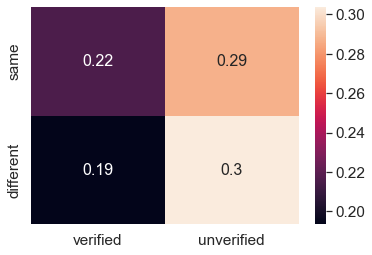

In [23]:
TP=len([x for x in ps if x]) / (len(results) + len(results_neg))
FN=len([x for x in ps if not x]) / (len(results) + len(results_neg))
FP=len([x for x in ns if x]) / (len(results) + len(results_neg))
TN=len([x for x in ns if not x]) / (len(results) + len(results_neg))
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[TP,FN],
         [FP,TN]]

df_cm = pd.DataFrame(array, ['same', 'different'], ['verified', 'unverified'])
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [24]:
TP

0.2154696132596685

In [25]:
FN

0.287292817679558

In [26]:
FP

0.19337016574585636

In [27]:
len(results) + len(results_neg)

181

In [29]:
import seaborn as sns
total_results = pd.DataFrame(data=[(x[2],"positive") for x in results]+[(x[2],"negative") for x in results_neg], columns=["distance", "type"])

<AxesSubplot:xlabel='distance', ylabel='Percent'>

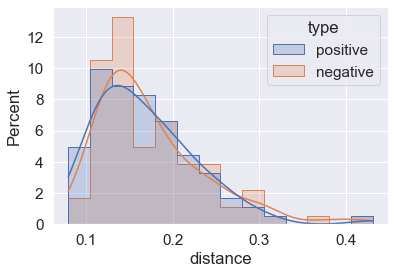

In [30]:
sns.histplot(total_results, x='distance', hue='type', element='step', kde=True, stat='percent')